In [57]:
import os
import cv2
import argparse
import librosa
import numpy as np
import easydict
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from sklearn.model_selection import train_test_split

import torch
import torchaudio
import torchaudio.transforms as T
from torch.utils import data
from torchvision import transforms
from torch.utils.data import Dataset

import audio_utils

In [2]:
def play_audio(waveform, sample_rate):
  waveform = waveform.numpy()

  num_channels, num_frames = waveform.shape
  if num_channels == 1:
    display(Audio(waveform[0], rate=sample_rate))
  elif num_channels == 2:
    display(Audio((waveform[0], waveform[1]), rate=sample_rate))
  else:
    raise ValueError("Waveform with more than 2 channels are not supported.")

def plot_complex_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.amplitude_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)
    
def plot_db_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(spec, origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

In [5]:
opt = easydict.EasyDict({
    "data_dir": '/data1/singing_inpainting/dataset',
    "input_length": 220500,
    "image_height": 1025,
    "image_width": 431,
    "bbox_shape": 120,
    "mask_type": 'time',
    "batch_size": 4,
    "mask_init": 'lerp',
    "phase" : 0,
    "num_workers" : 8,
    "spec_pow" : 2,
    "add_datasets": [],
    "pos_enc" : 'mel',
    })

In [53]:
trainset = dataset.InpaintDataset(opt, split='TRAIN')
dataloader = DataLoader(trainset, batch_size = opt.batch_size, shuffle = True, num_workers = opt.num_workers, pin_memory = True)
db_to_power = torchaudio.functional.DB_to_amplitude
pow_to_db = torchaudio.transforms.AmplitudeToDB('power')
for batch_idx, (audio, img, mask, mask_init) in enumerate(dataloader):
    if batch_idx > 5:
        stop

NameError: name 'stop' is not defined

In [54]:
a = audio[0]

In [56]:
Audio(a, rate=44100)

In [65]:
sa_n = audio_utils.get_spectrogram(a, power=None, return_complex=1)
sa_1 = audio_utils.get_spectrogram(a, power=1, return_complex=1)
sa_2 = audio_utils.get_spectrogram(a, power=2, return_complex=1)

In [74]:
scale = 'mel'
freq = np.linspace(0, 22050, 1025)
if scale == 'mel':
    freq = 2595 * np.log10(1+freq/700)
freq = freq / np.max(freq)
freq = torch.from_numpy(freq.astype(np.float32)).contiguous()
freq = freq.reshape(1, -1, 1)
freq = freq.expand(1, 1025, 431)


In [84]:
a = torch.ones([1, 3, 1025, 431])
a[0][0] *= 1
a[0][1] *= 2
a[0][2] *= 3
a

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[2., 2., 2.,  ..., 2., 2., 2.],
          [2., 2., 2.,  ..., 2., 2., 2.],
          [2., 2., 2.,  ..., 2., 2., 2.],
          ...,
          [2., 2., 2.,  ..., 2., 2., 2.],
          [2., 2., 2.,  ..., 2., 2., 2.],
          [2., 2., 2.,  ..., 2., 2., 2.]],

         [[3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          ...,
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.],
          [3., 3., 3.,  ..., 3., 3., 3.]]]])

In [127]:
steps += 1600
step_lr = max(0.1, 0.9**(steps/1000))
print(step_lr)

0.5068321851239135


In [4]:
import torch
import torch.nn as nn

In [25]:
# L1Loss = nn.L1Loss()
L1Loss = torch.nn.L1Loss(reduction='none')

In [26]:
a = torch.ones([4, 1, 1025, 431])
am = torch.mean(a, 0)
b = torch.ones([4, 1, 1025, 431])


In [28]:
torchaudio.info()

torch.Size([4, 1, 1025, 431])

In [37]:
lm = torch.mean(l, [1,2,3])

In [39]:
torch.__version__

'1.9.0+cu102'

In [193]:
spec_pad.shape

torch.Size([2, 1025, 433])

In [140]:
spec_pad[:,:,start].unsqueeze(1).shape

torch.Size([2, 1, 1025])

In [145]:
merged = torch.cat([spec_pad[:,:,start].unsqueeze(1), spec_pad[:,:,end+2].unsqueeze(1)], 1)
merged.shape

torch.Size([2, 2, 1025])

In [82]:
lerp_mask.shape, a.shape

(torch.Size([2, 1025, 431]), torch.Size([2, 1025, 431]))

In [141]:
merged = torch.cat([spec_pad[:,:,start].unsqueeze(1), spec_pad[:,:,end+2].unsqueeze(1)], 1)
merged = merged.permute(0, 2, 1)
merged.shape

torch.Size([2, 1025, 2])

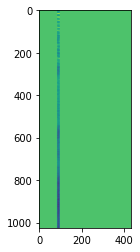

In [178]:
plt.imshow(lerp_mask[0])

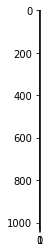

In [142]:
plt.imshow(merged[0].log())
plt.show()

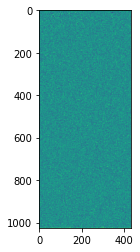

In [73]:
plt.imshow(spec_pad[1])

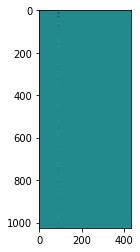

In [180]:
plt.imshow(lerp_mask[1])

In [188]:
lerp_mask[1].min(), lerp_mask[1].max()

(tensor(-133.5328), tensor(148.2249))

In [189]:
spec_pad[1][:,86:96].min(), spec_pad[1][:,86:96].max()

(tensor(-129.1734), tensor(144.4858))

In [185]:
start, end

(tensor(85), tensor(96))

In [65]:
def get_spectrogram(waveform, n_fft = 2048, win_len = 2048, hop_len = 512, power=2):
    spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_len,
    hop_length=hop_len,
    center=True,
    pad_mode="reflect",
    power=power,
    )
    return spectrogram(waveform)

def get_complex_spectrogram(waveform, n_fft = 2048, win_len = 2048, hop_len = 512, power=None, device='cuda', return_complex=0):
    spectrogram = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_len,
    hop_length=hop_len,
    center=True,
    pad_mode="reflect",
    power=power,
    return_complex=return_complex,
    )
    return spectrogram(waveform)

In [91]:
p1 = get_spectrogram(audio, power=1)
p2 = get_spectrogram(audio, power=2)
ca = get_complex_spectrogram(audio, device=None, return_complex=0)
ca2 = get_complex_spectrogram(audio, device=None, return_complex=1)
ca.shape, ca2.shape

(torch.Size([4, 1, 1025, 431, 2]), torch.Size([4, 1, 1025, 431]))

In [92]:
p1[0]

tensor([[[3.4234e-02, 4.6843e-02, 9.6203e-02,  ..., 1.2795e-02,
          6.1065e-02, 7.4127e-02],
         [1.0679e-01, 1.0961e-01, 6.4559e-02,  ..., 3.9508e-02,
          2.2653e-02, 5.2559e-02],
         [9.7338e-02, 1.2073e-01, 6.6320e-02,  ..., 6.2881e-02,
          4.3399e-02, 6.8009e-02],
         ...,
         [1.0507e-04, 3.7223e-04, 6.6788e-04,  ..., 7.5872e-04,
          1.4847e-03, 1.0360e-03],
         [1.5328e-04, 6.3308e-04, 9.9692e-04,  ..., 5.3756e-04,
          1.2656e-03, 4.4745e-04],
         [1.0045e-04, 6.6466e-04, 8.8739e-04,  ..., 7.6504e-04,
          1.3383e-03, 9.3500e-04]]])

In [93]:
torch.abs(ca)

tensor([[[[[3.4234e-02, 0.0000e+00],
           [4.6843e-02, 0.0000e+00],
           [9.6203e-02, 0.0000e+00],
           ...,
           [1.2795e-02, 0.0000e+00],
           [6.1065e-02, 0.0000e+00],
           [7.4127e-02, 0.0000e+00]],

          [[1.0679e-01, 3.7253e-09],
           [7.1723e-02, 8.2884e-02],
           [5.6109e-02, 3.1933e-02],
           ...,
           [2.2367e-02, 3.2567e-02],
           [1.4038e-02, 1.7779e-02],
           [5.2057e-02, 7.2411e-03]],

          [[9.7338e-02, 1.1176e-08],
           [9.3233e-02, 7.6710e-02],
           [6.5946e-02, 7.0366e-03],
           ...,
           [5.9097e-02, 2.1483e-02],
           [4.3019e-02, 5.7278e-03],
           [5.9288e-02, 3.3318e-02]],

          ...,

          [[1.0507e-04, 3.7253e-09],
           [1.8296e-04, 3.2416e-04],
           [6.5142e-04, 1.4736e-04],
           ...,
           [5.3215e-04, 5.4081e-04],
           [1.4657e-03, 2.3708e-04],
           [1.0033e-03, 2.5817e-04]],

          [[1.5328e-04, 

In [94]:
torch.abs(ca2).shape, torch.abs(ca).shape

(torch.Size([4, 1, 1025, 431]), torch.Size([4, 1, 1025, 431, 2]))

In [95]:
p1[0].shape, torch.abs(ca2).shape

(torch.Size([1, 1025, 431]), torch.Size([4, 1, 1025, 431]))

In [98]:
torch.abs(ca2)**2 == p2

tensor([[[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]]],


        [[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True]]],


        [[[True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          ...,
          [True, True, True,  ..., True, True, True],
          [True, True, True,  ..., True, True, True],
          [True, True, True, 

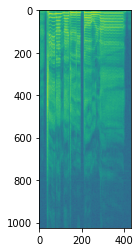

In [103]:
plt.imshow(p1[0][0].log())

In [104]:
p1.shape, p2.shape

(torch.Size([4, 1, 1025, 431]), torch.Size([4, 1, 1025, 431]))

In [106]:
mask.shape

torch.Size([4, 1, 1025, 431])

In [109]:
t = trainset[0][-1]
t.shape

torch.Size([1, 220500])
torch.Size([1, 1025, 431])
torch.Size([1, 1025, 431, 1])
torch.Size([1, 1025, 431])
torch.Size([1, 1025, 431, 1])


torch.Size([1, 1025, 431])

In [114]:
img.shape

torch.Size([4, 2, 1025, 431])

In [48]:
phase = torch.angle(ca2)
phase_np = np.asarray(phase)
phase_unwrapped = np.unwrap(phase_np)
phase = torch.tensor(phase_unwrapped).float()
print(phase.shape)


torch.Size([4, 1, 1025, 431])


In [51]:
img.shape

torch.Size([4, 2, 1025, 431])

In [54]:
a = audio_utils.get_spectrogram(audio)
b = torch.abs(ca2)

In [57]:
a.shape, b.shape

(torch.Size([4, 1, 1025, 431]), torch.Size([4, 1, 1025, 431]))

In [63]:
b.min(), b.max()

(tensor(0.), tensor(329.4502))

In [6]:
a, sr = torchaudio.load(os.path.join(folder, lis))
a_pad = torch.nn.functional.pad(a[0], (0, int(44100*5)-a.shape[-1]), mode='constant', value=0)

In [64]:


def get_comlex_spectrogram(waveform, n_fft = 1024, win_len = 1024, hop_len = 512, power=None):
    spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power,
    return_complex=0,
    )
    return spectrogram(waveform)

a.shape, a_pad.shape
a_spec = get_comlex_spectrogram(a_pad)

print(a_spec.shape)
plot_spectrogram(a_spec[:,:,1].pow(1))
play_audio(a_pad.unsqueeze(0), 44100)

NameError: name 'a_pad' is not defined

torch.Size([513, 431])


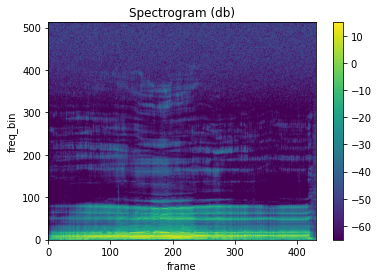

In [19]:
def get_spectrogram(waveform, n_fft = 1024, win_len = 1024, hop_len = 512, power=2):
    spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power,
    return_complex=0,
    )
    return spectrogram(waveform)

a.shape, a_pad.shape
a_power_spec = get_spectrogram(a_pad)

print(a_power_spec.shape)
plot_power_spectrogram(a_power_spec[:,:].pow(1))
play_audio(a_pad.unsqueeze(0), 44100)

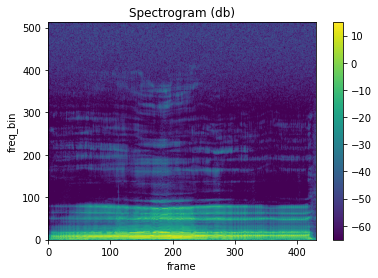

In [18]:
griffinlim = torchaudio.transforms.GriffinLim(n_fft=1024, n_iter=60, win_length=1024, hop_length=512)
estimated = griffinlim(a_power_spec)
estimated_spec = get_power_spectrogram(estimated)
plot_power_spectrogram(estimated_spec.pow(1))
play_audio(estimated.unsqueeze(0), 44100)


In [14]:
estimated.shape

torch.Size([220160])

In [55]:
a_spec.shape

torch.Size([513, 431, 2])

torch.Size([513, 431, 2])


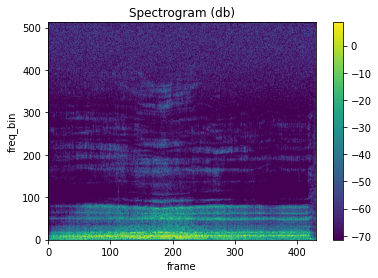

In [56]:
real = a_spec[:,:,0]
complx = a_spec[:,:,-1]
comb = torch.cat((real.unsqueeze(-1), complx.unsqueeze(-1)), -1)
a_istft = torch.istft(comb, n_fft=1024, win_length=1024, hop_length=512)
a_istft.shape

a_istft_spec = get_comlex_spectrogram(a_istft)

print(a_istft_spec.shape)
plot_spectrogram(a_istft_spec[:,:,0].pow(1))
play_audio(a_istft.unsqueeze(0), 44100)

NameError: name 'opt' is not defined

In [402]:
ALLMASKTYPES = ['time_masking', 'bbox', 'free_form']

class InpaintDataset(Dataset):
    def __init__(self, opt, split):
        self.opt = opt
        self.split = split
        
        self.get_list()
        
    def __getitem__(self, index):
        audio = self.get_audio(index)
        
        if self.split == 'TRAIN':
            if self.opt.mask_type == 'time_masking':
                mask = self.time_mask()
            if self.opt.mask_type == 'bbox':
                mask = self.bbox2mask()
            if self.opt.mask_type == 'free_form':
                mask = self.random_ff_mask()
        elif self.split in ['VALID', 'TEST']:
            if self.opt.mask_type == 'time_masking':
                masks_dir = '../split/fixedmask_time'
                mask = np.load(os.path.join(masks_dir, str(index)))
            if self.opt.mask_type == 'bbox':
                masks_dir = '../split/fixedmask_bbox'
                mask = np.load(os.path.join(masks_dir, str(index)))
            if self.opt.mask_type == 'free_form':
                masks_dir = '../split/fixedmask_freeform'
                mask = np.load(os.path.join(masks_dir, str(index)))

        audio = audio.permute(2, 0, 1).contiguous()
        mask = torch.from_numpy(mask.astype(np.float32)).contiguous()
        
        return audio, mask
    
    def get_list(self):
        margs_trainvalid = np.loadtxt('../split/margs_trainvalid.txt', delimiter=',', dtype=str)
        margs_test = np.loadtxt('../split/margs_test.txt', delimiter=',', dtype=str)
        nuss_trainvalid = np.loadtxt('../split/nuss_trainvalid.txt', delimiter=',', dtype=str)
        nuss_test = np.loadtxt('../split/nuss_test.txt', delimiter=',', dtype=str)
        vocals_trainvalid = np.loadtxt('../split/vocals_trainvalid.txt', delimiter=',', dtype=str)
        vocals_test = np.loadtxt('../split/vocals_test.txt', delimiter=',', dtype=str)

        margs_train, margs_valid = train_test_split(margs_trainvalid, test_size=0.1, shuffle=False, random_state=21)
        nuss_train, nuss_valid = train_test_split(nuss_trainvalid, test_size=0.1, shuffle=False, random_state=21)
        vocals_train, vocals_valid = train_test_split(vocals_trainvalid, test_size=0.1, shuffle=False, random_state=21)

        if self.split == 'TRAIN':
            train_list = list(margs_train) + list(nuss_train) + list(vocals_train)
            self.fl = train_list
        elif self.split == 'VALID':
            valid_list = list(margs_valid) + list(nuss_valid) + list(vocals_valid)
            self.fl = valid_list
        elif self.split == 'TEST':
            test_list = list(margs_test) + list(nuss_valid) + list(vocals_test)
            self.fl = test_list
    
    def get_audio(self, index):
        fn = self.fl[index]
        audio_path = os.path.join(self.opt.data_dir, fn)
        audio, sr = torchaudio.load(audio_path)
        random_idx = int(np.floor(np.random.random(1) * (audio.shape[-1]-self.opt.input_length)))
        audio = audio[:,random_idx:random_idx+self.opt.input_length]
        audio_pad = torch.nn.functional.pad(audio, (0, 44100*5-audio.shape[-1]), mode='constant', value=0)
        return audio_pad

    def random_bbox(self):
        max_freq_ix = self.opt.image_height - self.opt.bbox_shape
        max_frame_ix = self.opt.image_width - opt.bbox_shape

        box_freq_ix = np.random.randint(max_freq_ix)
        box_frame_ix = np.random.randint(max_frame_ix)

        return (box_freq_ix, box_frame_ix, self.opt.bbox_shape, self.opt.bbox_shape)

    def time_mask(self):
        mask_width = np.random.randint(low=8, high=87)
        max_frame_ix = self.opt.image_width - mask_width
        t = np.random.randint(max_frame_ix)
        mask = np.zeros((self.opt.image_height, self.opt.image_width))
        mask[:,t:t+mask_width] = 1
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def bbox2mask(self):
        bboxs = []
        times = np.random.randint(8)
        for i in range(times):
            bbox = random_bbox(self.opt)
            bboxs.append(bbox)
        mask = np.zeros((self.opt.image_height, self.opt.image_width), np.float32)
        for bbox in bboxs:
            h = int(bbox[2] * 0.1) + np.random.randint(int(bbox[2] * 0.2 + 1))
            w = int(bbox[3] * 0.1) + np.random.randint(int(bbox[3] * 0.2) + 1)
            mask[(bbox[0] + h) : (bbox[0] + bbox[2] - h), (bbox[1] + w) : (bbox[1] + bbox[3] - w)] = 1.
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def random_ff_mask(self):
        """Generate a random free form mask with configuration.
        Args:
            config: Config should have configuration including IMG_SHAPES,
                VERTICAL_MARGIN, HEIGHT, HORIZONTAL_MARGIN, WIDTH.
        Returns:
            tuple: (top, left, height, width)
        """
        mask = np.zeros((self.opt.image_height, self.opt.image_width), np.float32)
        max_angle = 4
        max_len = 200
        max_width = 20
        times = np.random.randint(7)
        for i in range(times):
            start_x = np.random.randint(self.opt.image_width)
            start_y = np.random.randint(self.opt.image_height)
            for j in range(1 + np.random.randint(5)):
                angle = 0.01 + np.random.randint(max_angle)
                if i % 2 == 0:
                    angle = 2 * 3.1415926 - angle
                length = 10 + np.random.randint(max_len)
                brush_w = 5 + np.random.randint(max_width)
                end_x = (start_x + length * np.sin(angle)).astype(np.int32)
                end_y = (start_y + length * np.cos(angle)).astype(np.int32)
                cv2.line(mask, (start_y, start_x), (end_y, end_x), 1.0, brush_w)
                start_x, start_y = end_x, end_y
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def __len__(self):
        return len(self.fl)

In [62]:
5/431*8

0.09280742459396751

In [279]:
opt = easydict.EasyDict({
    "data_dir": '../dataset',
    "input_length": 220500,
    "image_height": 513,
    "image_width": 431,
    "bbox_shape": 120,
    "mask_type": 'free_form'
    })

In [280]:
train_dataset = InpaintDataset(opt, split='TRAIN')
valid_dataset = InpaintDataset(opt, split='VALID')
test_dataset = InpaintDataset(opt, split='TEST')

audio, mask = train_dataset[1]
audio.shape, mask.shape

(torch.Size([1, 220500]), torch.Size([1, 513, 431]))

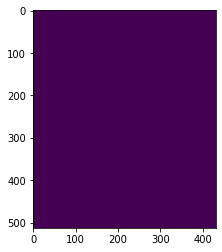

In [281]:
plt.imshow(mask[0])

In [282]:
len(valid_dataset), len(test_dataset)

(864, 1250)

In [276]:
def time_mask_fixed():
    mask_width = np.random.randint(low=8, high=87)
    max_frame_ix = opt.image_width - mask_width
    t = np.random.randint(max_frame_ix)
    mask = np.zeros((opt.image_height, opt.image_width))
    mask[:,t:t+mask_width] = 1
    return mask.reshape((1, ) + mask.shape).astype(np.float32)


def random_bbox_fixed(opt):
    max_freq_ix = opt.image_height - opt.bbox_shape
    max_frame_ix = opt.image_width - opt.bbox_shape

    box_freq_ix = np.random.randint(max_freq_ix)
    box_frame_ix = np.random.randint(max_frame_ix)

    return (box_freq_ix, box_frame_ix, opt.bbox_shape, opt.bbox_shape)

def bbox2mask_fixed():
    bboxs = []
    times = np.random.randint(8)
    for i in range(times):
        bbox = random_bbox_fixed(opt)
        bboxs.append(bbox)
    mask = np.zeros((opt.image_height, opt.image_width), np.float32)
    for bbox in bboxs:
        h = int(bbox[2] * 0.1) + np.random.randint(int(bbox[2] * 0.2 + 1))
        w = int(bbox[3] * 0.1) + np.random.randint(int(bbox[3] * 0.2) + 1)
        mask[(bbox[0] + h) : (bbox[0] + bbox[2] - h), (bbox[1] + w) : (bbox[1] + bbox[3] - w)] = 1.
    return mask.reshape((1, ) + mask.shape).astype(np.float32)

def random_ff_mask_fixed():
    """Generate a random free form mask with configuration.
    Args:
        config: Config should have configuration including IMG_SHAPES,
            VERTICAL_MARGIN, HEIGHT, HORIZONTAL_MARGIN, WIDTH.
    Returns:
        tuple: (top, left, height, width)
    """
    mask = np.zeros((opt.image_height, opt.image_width), np.float32)
    max_angle = 4
    max_len = 200
    max_width = 20
    times = np.random.randint(7)
    for i in range(times):
        start_x = np.random.randint(opt.image_width)
        start_y = np.random.randint(opt.image_height)
        for j in range(1 + np.random.randint(5)):
            angle = 0.01 + np.random.randint(max_angle)
            if i % 2 == 0:
                angle = 2 * 3.1415926 - angle
            length = 10 + np.random.randint(max_len)
            brush_w = 5 + np.random.randint(max_width)
            end_x = (start_x + length * np.sin(angle)).astype(np.int32)
            end_y = (start_y + length * np.cos(angle)).astype(np.int32)
            cv2.line(mask, (start_y, start_x), (end_y, end_x), 1.0, brush_w)
            start_x, start_y = end_x, end_y
    return mask.reshape((1, ) + mask.shape).astype(np.float32)

In [277]:
for i in range(1500):
    time_mask = time_mask_fixed()
    bbox_mask = bbox2mask_fixed()
    ff_mask = random_ff_mask_fixed()
#     np.save('../split/fixedmask_time/' + str(i) + '.npy', time_mask)
#     np.save('../split/fixedmask_bbox/' + str(i) + '.npy', bbox_mask)
#     np.save('../split/fixedmask_freeform/' + str(i) + '.npy', ff_mask)
    

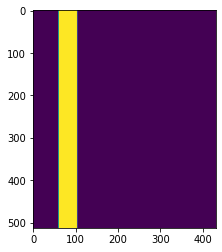

In [268]:
plt.imshow(mask[0])

In [284]:
audio.max()

tensor(0.2205)

In [290]:
def get_comlex_spectrogram(waveform, n_fft = 1024, win_len = 1024, hop_len = 512, power=None):
    spectrogram = T.Spectrogram(
      n_fft=n_fft,
      win_length=win_len,
      hop_length=hop_len,
      center=True,
      pad_mode="reflect",
      power=power,
    )
    return spectrogram(waveform)

In [20]:
mmax_value = 0
mmin_value = 0
for i, wh in enumerate(whole):
    y, sr = torchaudio.load(os.path.join(folder, wh))
    spec = get_spectrogram(y)
    max_value = spec.max()
    min_value = spec.min()
    if max_value > mmax_value:
        print('max update:', max_value)
        mmax_value = max_value
    if min_value < mmin_value:
        print('min update:', min_value)
        mmin_value = min_value
    

max update: tensor(4319.4746)
max update: tensor(11113.8252)
max update: tensor(12897.7910)
max update: tensor(36249.6484)
max update: tensor(40809.8750)
max update: tensor(46836.0977)
max update: tensor(48998.1289)
max update: tensor(49826.1211)
max update: tensor(88483.5391)
max update: tensor(93507.8281)


In [6]:
import os
import cv2
import argparse
import librosa
import numpy as np

import torch
import torchaudio
import torchaudio.transforms as T
from torch.utils import data
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, display

import easydict
from sklearn.model_selection import train_test_split
ALLMASKTYPES = ['time', 'bbox', 'freeform']


class InpaintDataset(Dataset):
    def __init__(self, opt, split):
        self.opt = opt
        self.split = split
        
        self.get_list()
        
    def __getitem__(self, index):
        audio = self.get_audio(index)
        # spec = self.get_comlex_spectrogram(audio)
        spec = self.get_spectrogram(audio).unsqueeze(-1)

        if self.split == 'TRAIN':
            if self.opt.mask_type == 'time':
                mask = self.time_mask()
            if self.opt.mask_type == 'bbox':
                mask = self.bbox2mask()
            if self.opt.mask_type == 'freeform':
                mask = self.random_ff_mask()
        elif self.split in ['VALID', 'TEST']:
            if self.opt.mask_type == 'time':
                masks_dir = '../split/fixedmask_time'
                mask = np.load(os.path.join(masks_dir, str(index)))
            if self.opt.mask_type == 'bbox':
                masks_dir = '../split/fixedmask_bbox'
                mask = np.load(os.path.join(masks_dir, str(index)))
            if self.opt.mask_type == 'freeform':
                masks_dir = '../split/fixedmask_freeform'
                mask = np.load(os.path.join(masks_dir, str(index)))

        spec = spec.squeeze(0).permute(2, 0, 1).contiguous()
        mask = torch.from_numpy(mask.astype(np.float32)).contiguous()

        return spec, mask
    
    def get_list(self):
        margs_trainvalid = np.loadtxt('../split/margs_trainvalid.txt', delimiter=',', dtype=str)
        margs_test = np.loadtxt('../split/margs_test.txt', delimiter=',', dtype=str)
        nuss_trainvalid = np.loadtxt('../split/nuss_trainvalid.txt', delimiter=',', dtype=str)
        nuss_test = np.loadtxt('../split/nuss_test.txt', delimiter=',', dtype=str)
        vocals_trainvalid = np.loadtxt('../split/vocals_trainvalid.txt', delimiter=',', dtype=str)
        vocals_test = np.loadtxt('../split/vocals_test.txt', delimiter=',', dtype=str)

        margs_train, margs_valid = train_test_split(margs_trainvalid, test_size=0.1, shuffle=False, random_state=21)
        nuss_train, nuss_valid = train_test_split(nuss_trainvalid, test_size=0.1, shuffle=False, random_state=21)
        vocals_train, vocals_valid = train_test_split(vocals_trainvalid, test_size=0.1, shuffle=False, random_state=21)

        if self.split == 'TRAIN':
            train_list = self.dataset_merge(list(margs_train) + list(nuss_train) + list(vocals_train))
            self.fl = train_list
        elif self.split == 'VALID':
            valid_list = self.dataset_merge(list(margs_valid) + list(nuss_valid) + list(vocals_valid))
            self.fl = valid_list
        elif self.split == 'TEST':
            test_list = self.dataset_merge(list(margs_test) + list(nuss_test) + list(vocals_test))
            self.fl = test_list
    
    def dataset_merge(self, dataset):
        merged_dataset = []
        for ix, lis in enumerate(dataset):
            dat = torchaudio.info(os.path.join(self.opt.data_dir, lis))
            if dat.num_frames > 44100*2.5:
                merged_dataset.append(lis)
        return merged_dataset

    def get_audio(self, index):
        fn = self.fl[index]
        audio_path = os.path.join(self.opt.data_dir, fn)
        num_frames = torchaudio.info(audio_path).num_frames
        if num_frames <= self.opt.input_length:
            audio, sr = torchaudio.load(audio_path)
            audio = torch.nn.functional.pad(audio, (0, self.opt.input_length-num_frames), mode='constant', value=0)
        else:
            random_idx = np.random.randint(num_frames - self.opt.input_length)
            audio, sr = torchaudio.load(audio_path, frame_offset=random_idx, num_frames=self.opt.input_length)
        return audio

    def get_comlex_spectrogram(self, waveform, n_fft = 1024, win_len = 1024, hop_len = 512, power=None):
        spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_len,
        hop_length=hop_len,
        center=True,
        pad_mode="reflect",
        power=power,
        return_complex=0,
        )
        return spectrogram(waveform)

    def get_spectrogram(self, waveform, n_fft = 1024, win_len = 1024, hop_len = 512, power=2):
        spectrogram = T.Spectrogram(
        n_fft=n_fft,
        win_length=win_len,
        hop_length=hop_len,
        center=True,
        pad_mode="reflect",
        power=power,
        )
        return spectrogram(waveform)

    def random_bbox(self):
        max_freq_ix = self.opt.image_height - self.opt.bbox_shape
        max_frame_ix = self.opt.image_width - self.opt.bbox_shape

        box_freq_ix = np.random.randint(max_freq_ix)
        box_frame_ix = np.random.randint(max_frame_ix)

        return (box_freq_ix, box_frame_ix, self.opt.bbox_shape, self.opt.bbox_shape)

    def time_mask(self):
        mask_width = np.random.randint(low=8, high=87)
        max_frame_ix = self.opt.image_width - mask_width
        t = np.random.randint(max_frame_ix)
        mask = np.zeros((self.opt.image_height, self.opt.image_width))
        mask[:,t:t+mask_width] = 1
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def bbox2mask(self):
        bboxs = []
        times = np.random.randint(8)
        for i in range(times):
            bbox = self.random_bbox()
            bboxs.append(bbox)
        mask = np.zeros((self.opt.image_height, self.opt.image_width), np.float32)
        for bbox in bboxs:
            h = int(bbox[2] * 0.1) + np.random.randint(int(bbox[2] * 0.2 + 1))
            w = int(bbox[3] * 0.1) + np.random.randint(int(bbox[3] * 0.2) + 1)
            mask[(bbox[0] + h) : (bbox[0] + bbox[2] - h), (bbox[1] + w) : (bbox[1] + bbox[3] - w)] = 1.
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def random_ff_mask(self):
        """Generate a random free form mask with configuration.
        Args:
            config: Config should have configuration including IMG_SHAPES,
                VERTICAL_MARGIN, HEIGHT, HORIZONTAL_MARGIN, WIDTH.
        Returns:
            tuple: (top, left, height, width)
        """
        mask = np.zeros((self.opt.image_height, self.opt.image_width), np.float32)
        max_angle = 4
        max_len = 200
        max_width = 20
        times = np.random.randint(7)
        for i in range(times):
            start_x = np.random.randint(self.opt.image_width)
            start_y = np.random.randint(self.opt.image_height)
            for j in range(1 + np.random.randint(5)):
                angle = 0.01 + np.random.randint(max_angle)
                if i % 2 == 0:
                    angle = 2 * 3.1415926 - angle
                length = 10 + np.random.randint(max_len)
                brush_w = 5 + np.random.randint(max_width)
                end_x = (start_x + length * np.sin(angle)).astype(np.int32)
                end_y = (start_y + length * np.cos(angle)).astype(np.int32)
                cv2.line(mask, (start_y, start_x), (end_y, end_x), 1.0, brush_w)
                start_x, start_y = end_x, end_y
        return mask.reshape((1, ) + mask.shape).astype(np.float32)

    def __len__(self):
        return len(self.fl)

In [16]:
opt = easydict.EasyDict({
    "data_dir": '../dataset',
    "input_length": 220500,
    "image_height": 513,
    "image_width": 431,
    "bbox_shape": 120,
    "num_workers": 4,
    "mask_type": 'free_form',
    "batch_size": 4,
    "mask_type" : 'time',
    })

In [17]:
trainset = InpaintDataset(opt, split='TRAIN')
dataloader = DataLoader(trainset, batch_size = opt.batch_size, shuffle = True, num_workers = opt.num_workers, pin_memory = True)


In [24]:
trainset[0][0][0].min()

tensor(1.1927e-12)

In [23]:
bbox_list = glob.glob(os.path.join(bbox_dir, '*'))
time_list = glob.glob(os.path.join(time_dir, '*'))
freeform_list = glob.glob(os.path.join(freeform_dir, '*'))


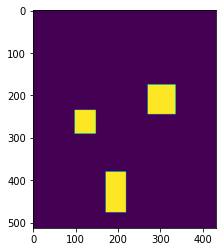

In [63]:
bbox_data = np.load(bbox_list[2])
plt.imshow(bbox_data[0])

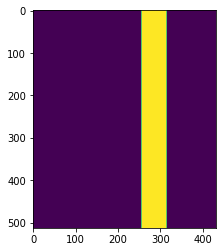

In [30]:
time_data = np.load(time_list[4])
plt.imshow(time_data[0])

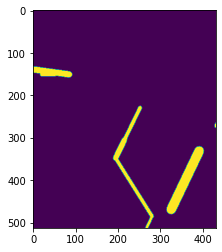

In [73]:
freeform_data = np.load(freeform_list[11])
plt.imshow(freeform_data[0])

In [74]:
freeform_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [75]:
1-freeform_data

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]], dtype=float32)